In [12]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load dataset
df = pd.read_csv("../data/german_credit_data.csv")

# First 5 rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [13]:
# General info
# df.info()

# Summary statistics of numerical columns
# df.describe()

# Missing value analysis
# df.isnull().sum()

# Histograms - numerical variables
# df.nunique()


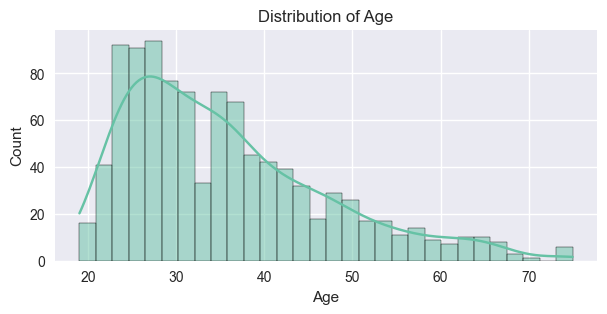

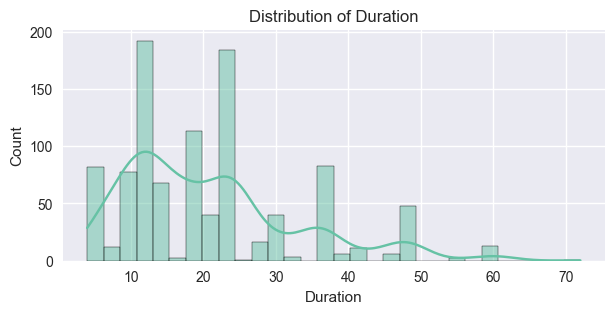

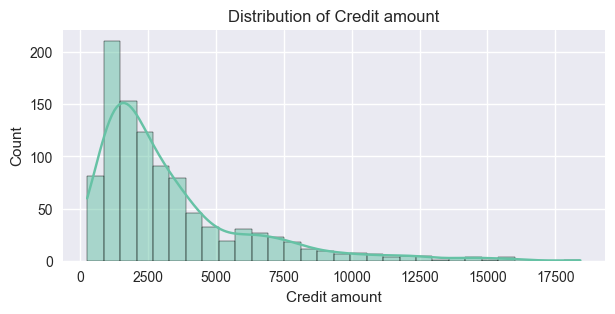

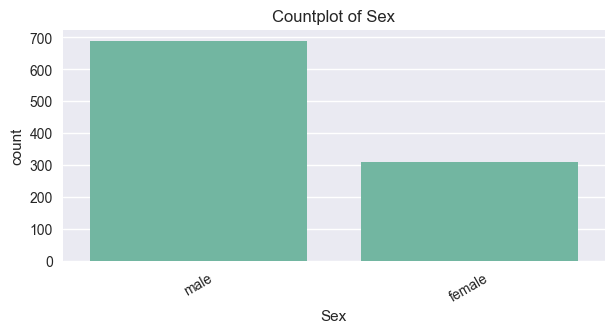

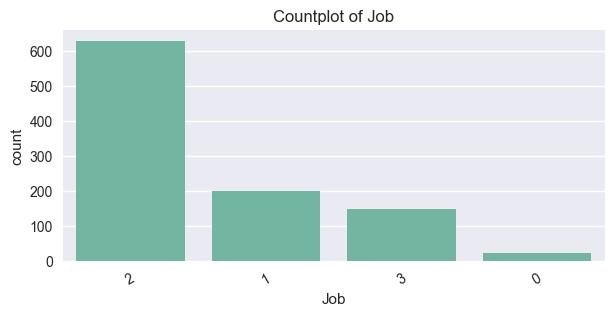

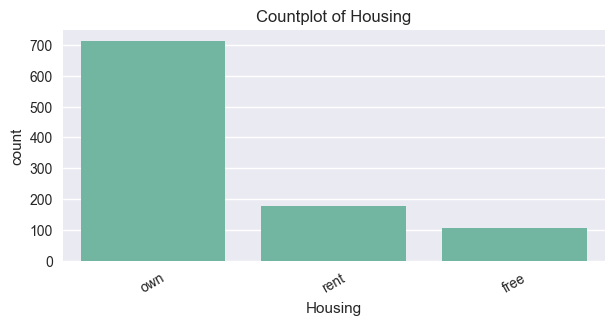

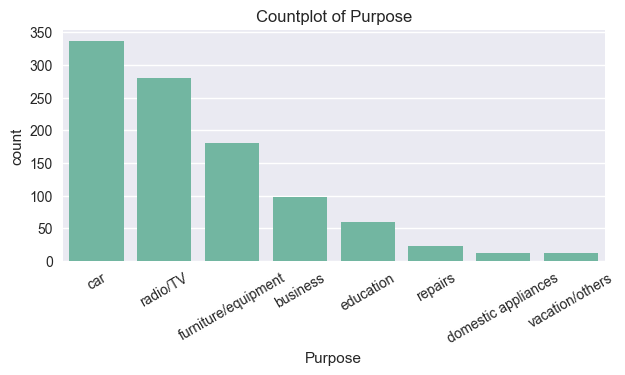

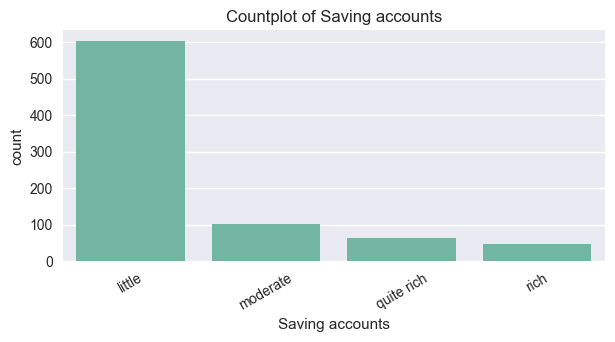

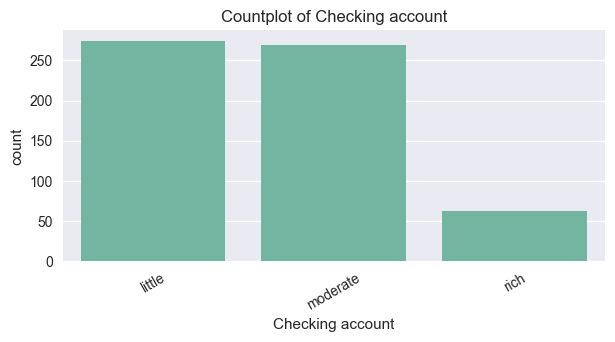

In [14]:
# Histograms - numerical variables
num_cols = ["Age", "Duration", "Credit amount"]

for col in num_cols:
    plt.figure(figsize=(7,3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"../images/distributions/Distribution_of_{col}.png", dpi=150)
    plt.show()

# Countplot - categorical variables
cat_cols = ["Sex", "Job", "Housing", "Purpose", "Saving accounts", "Checking account"]

for col in cat_cols:
    plt.figure(figsize=(7,3))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=30)
    plt.savefig(f"../images/countplots/Countplot_of_{col}.png", dpi=150)
    plt.show()


,missing_cnt,missing_%
Checking account,394,39.4
Saving accounts,183,18.3


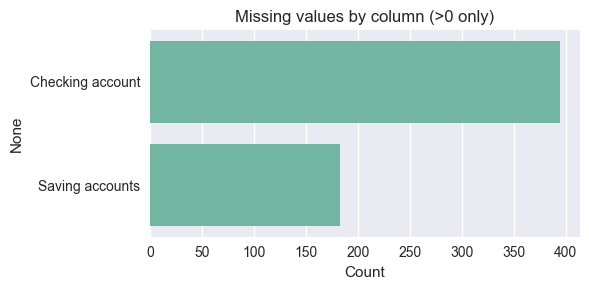

In [15]:
# Missing summary
missing_cnt = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_cnt / len(df) * 100).round(1)

# Filter only columns with missing values greater than 0
missing_filtered = missing_cnt[missing_cnt > 0]
missing_pct_filtered = missing_pct[missing_cnt > 0]

display(pd.DataFrame({"missing_cnt": missing_filtered, "missing_%": missing_pct_filtered}))

# Bar chart
plt.figure(figsize=(6,3))
sns.barplot(x=missing_filtered.values, y=missing_filtered.index)
plt.title("Missing values by column (>0 only)")
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("../images/missing_values/Missing_values_filtered.png", dpi=150)
plt.show()

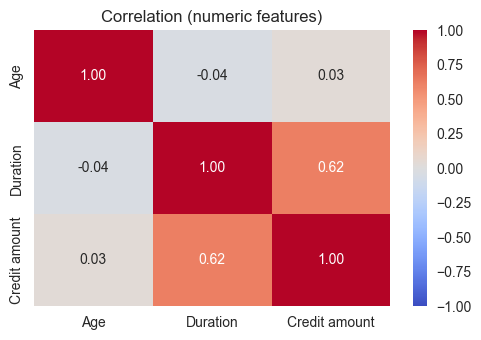

In [16]:
# Correlation (numeric features)
num_cols = ["Age", "Duration", "Credit amount"] 
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(5,3.5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation (numeric features)")
plt.tight_layout()
plt.savefig("../images/correlations/Correlation_numeric.png", dpi=150)
plt.show()


Note: When examining the correlation matrix:

- There is a moderate-to-strong positive correlation (0.62) between Credit amount and Duration.

- The Age variable is almost uncorrelated with the other two (around 0).

- This indicates that larger loan amounts are generally associated with longer durations, while age behaves independently.